# How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for all data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills
4. Visualize for highest demand skills

#### Original Exploration

[18_Matplotlib_Box_Plots.ipynb](../2_Advanced/18_Matplotlib_Box_Plots.ipynb)

[20_Seaborn_Intro.ipynb](../2_Advanced/20_Seaborn_Intro.ipynb)

### Import Libraries and Data

In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Salary Distribution by Job Title
<a id='role_country'></a>

In [169]:
# Setting what role and which country to explore
role = 'Data Analyst'
country = 'Hungary'

In [170]:
# Filtering for the country and dropping postings with null values in the salary_year_avg column
df_country = df[df['job_country'] == country].dropna(subset=['salary_year_avg']).copy()

In [171]:
# Getting the top 6 titles
job_titles = df_country['job_title_short'].value_counts().index[:6].tolist()

# Filtering for the top 6 titles
df_country_top6 = df_country[df_country['job_title_short'].isin(job_titles)]

# Order the titles by the median salary
job_order = df_country_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

# Display
job_order.tolist()

['Data Engineer',
 'Data Scientist',
 'Senior Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Software Engineer']

### Plot Salary Distribution

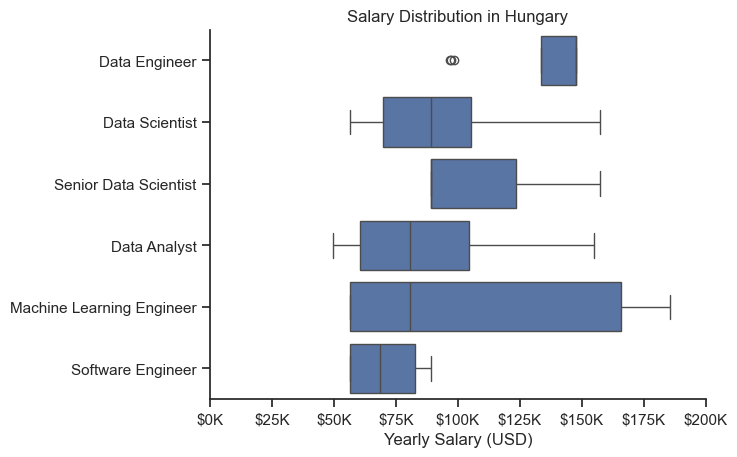

In [172]:
# Upper limit of the salaries shown
xlim = 200000

sns.boxplot(data=df_country_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# Titles and limits
plt.title(f'Salary Distribution in {country}')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, xlim)

# Formatting the salary ticks
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

### Investigate Median Salary vs Skill for Our Target Role

We filter the original data set to have only postings of our target role where salary information is provided.

In [173]:
# Filter for role and country and dropping rows with null salaries
df_role_country = df[(df['job_title_short'] == role) & (df['job_country'] == country)].dropna(subset=['salary_year_avg']).copy()

df_role_country = df_role_country.explode('job_skills')

df_role_country[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11639,56700.0,sap
55707,80850.0,sap
61968,111202.0,sql
61968,111202.0,python
61968,111202.0,redshift


### Determine The Highest Paid Skills and Most Demanded Skills

Getting the top ten highes-paying skills for our targeted role by calculating median salaries for each skill listed in our data set.

In [174]:
df_role_top_pay = df_role_country.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_role_top_pay = df_role_top_pay.head(10)

df_role_top_pay

,count,median
job_skills,,
azure,1,155000.0
gcp,1,155000.0
snowflake,1,155000.0
databricks,2,113950.0
aws,2,113950.0
redshift,1,111202.0
atlassian,1,100500.0
tableau,4,99500.0
sql,6,99500.0


Getting the count and median salary for each skill, sorted descending by their counts.

In [175]:
df_role_skills = df_role_country.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_role_skills = df_role_skills.head(10).sort_values(by='median', ascending=False)

df_role_skills

,count,median
job_skills,,
databricks,2,113950.0
aws,2,113950.0
atlassian,1,100500.0
sql,6,99500.0
tableau,4,99500.0
python,5,98500.0
excel,4,85700.0
git,2,81000.0
sheets,2,75757.0


Plotting Our Findings

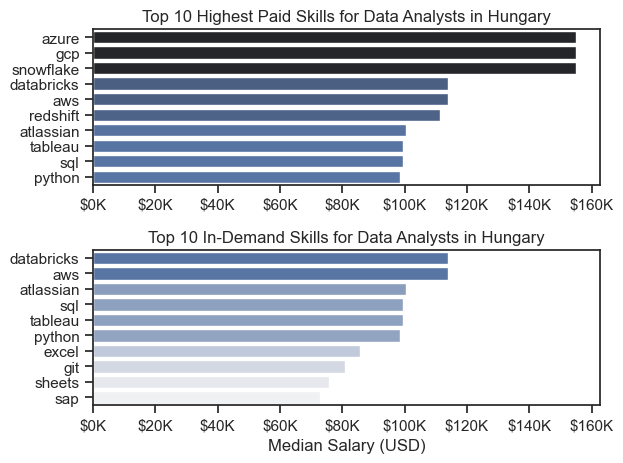

In [176]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_role_top_pay, x='median', y=df_role_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].set_title(f'Top 10 Highest Paid Skills for {role}s in {country}')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data=df_role_skills, x='median', y=df_role_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title(f'Top 10 In-Demand Skills for {role}s in {country}')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()
plt.show()